# Exercise 5.1 

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). 
What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot
import scipy.stats

In [2]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)

# 5'10'' in cm
h1 = 177.8 
# 6'1'' in cm
h2 = 185.4

# US male population in range.
male_percentage = dist.cdf(h2)-dist.cdf(h1)
print('Percentage of us male population in this range:', str(round(male_percentage*100,2)) + '%')

Percentage of us male population in this range: 34.21%


# Exercise 5.2 

To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.
Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [3]:
alpha = 1.7
xm = 1
dist = scipy.stats.pareto(b=alpha, scale=xm)
dist.median()

1.5034066538560549

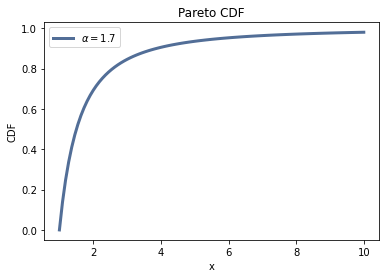

In [4]:
# plotting the distribution

xs, ps = thinkstats2.RenderParetoCdf(xm, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(title='Pareto CDF', xlabel='x',ylabel='CDF')

In [5]:
# calculating the mean of human height in pareto world.

dist.mean()

2.428571428571429

In [6]:
# calculating the fraction of the population that is shorter than the mean.

dist.cdf(dist.mean())

0.778739697565288

In [7]:
# people that we expect taller than 1km(1000m), out of 7 billion population.

(1 - dist.cdf(1000)) * 7e9

55602.976430479954

In [8]:
# considering roughly 600 kilometers,the tall of tallest person to be. 

(1 - dist.cdf(600*1000)) * 7e9

1.0525452731613427

# Exercise 6.1 

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/ cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.
The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under $5000.” The highest range includes respondents who made “$250,000 or more.”
PDF

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are dis- tributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.
It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 106, or one million dollars.
InterpolateSample generates a pseudo-sample; that is, a sample of house- hold incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.
Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

In [9]:
import pandas as pd
import hinc

def InterpolateSample(df, log_upper=6.0):
    """Function for returning the log sample."""
    
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)
    
    # get the lower bounds by shifting the upper bound and filling in the first element
    df['log_lower'] = df.log_upper.shift(1)
    
    df.log_lower[0] = 3.0
    
    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def summary(log_sample):
    """function for calculating mean, standard deviation, median, skewness, pearson skewness and cdf mean."""
    sample = np.power(10, log_sample)
    mean = sample.mean()
    print('Mean of resulting sample:', mean)
    print('Standard deviation of resulting sample:', sample.std())
    print('Median of resulting sample:', thinkstats2.Median(sample))
    print('Skewness of resulting sample:', thinkstats2.Skewness(sample))
    print('Pearson skewness of resulting sample:', thinkstats2.PearsonMedianSkewness(sample))
    cdf = thinkstats2.Cdf(sample)
    print('Fraction of households that report a taxable income below the mean:', cdf[mean])

    
def main():
    
    df = hinc.ReadData()
    pd.set_option('mode.chained_assignment', None)
    
    log_sample = InterpolateSample(df, log_upper=6.0)
    print ('\033[1mResults with log_upper as 6:\033[0m')
    summary(log_sample)
    
    # testing with higher bound values.
    log_sample = InterpolateSample(df, log_upper=7.0)
    print ('\n''\033[1mResults with log_upper as 7:\033[0m')
    summary(log_sample)
    
    log_sample = InterpolateSample(df, log_upper=8.0)
    print ('\n''\033[1mResults with log_upper as 8:\033[0m')
    summary(log_sample)
    
    
if __name__ == "__main__":
    main()

Results with log_upper as 6:
Mean of resulting sample: 74278.7075311872
Standard deviation of resulting sample: 93946.92996347835
Median of resulting sample: 51226.45447894046
Skewness of resulting sample: 4.949920244429583
Pearson skewness of resulting sample: 0.7361258019141782
Fraction of households that report a taxable income below the mean: 0.660005879566872

Results with log_upper as 7:
Mean of resulting sample: 124267.39722164697
Standard deviation of resulting sample: 559608.5013743473
Median of resulting sample: 51226.45447894046
Skewness of resulting sample: 11.603690267537793
Pearson skewness of resulting sample: 0.39156450927742087
Fraction of households that report a taxable income below the mean: 0.8565630665207663

Results with log_upper as 8:
Mean of resulting sample: 457453.4872473685
Standard deviation of resulting sample: 4434938.612826857
Median of resulting sample: 51226.45447894046
Skewness of resulting sample: 14.892459804414136
Pearson skewness of resulting sam

As per my observation, when we calculate the statistics by increasing the upper bound, the Skewness of the resulting sample is increased however the Pearson skewness is decreased. The reason being the significant increase denominator value which is the standard deviation and not much serious change in te mean, when we are trying to calculate the Pearson skewness. As a result, Pearson skewness appears to be ineffective as a summary statistic in this case. A statistic with context such as the fraction of households that report a taxable income below the mean (CDF) is a preferable choice.